In [2]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


In [11]:
def extract_package_name(row):
    package_names = row['textual_description'].split(',')[0].replace('start entry ', '')
    package_names = package_names.split('/')
    package_name = package_names[0]

    
    version_match = re.search(r'-(\d+(\.\d+){0,2})$', package_name)
    version = version_match.group(1) if version_match else "Unknown"
    package_name = re.sub(r'-\d+(\.\d+){0,5}$', '', package_name)
    return package_name

In [12]:
new_test_data = pd.read_csv('..\..\data\\test_reduced.csv')

In [13]:
new_test_data['package_name'] =  new_test_data.apply(lambda row: pd.Series(extract_package_name(row)),  axis=1)

In [14]:
new_test_data.head()

,textual_description,label,package_name
0,"start entry linkify-it-py-2.0.0/setup.py, use ...",0,linkify-it-py
1,"start entry dill-0.3.5.1/setup.py, import oper...",0,dill
2,start entry requirements-parser-0.5.0/setup.py...,0,requirements-parser
3,"start entry django-modelcluster-6.0/setup.py, ...",0,django-modelcluster
4,"start entry tpcvverencode-4.45/setup.py, impor...",1,tpcvverencode


In [22]:
new_test_data.to_csv('..\..\data\\test_reduced_p.csv', index=False)

In [6]:
test_package_names = new_test_data['package_name'].to_list()

In [7]:
len(test_package_names)

509

# GPT

In [ ]:

# input_file = "../ZSP_test_baseline/gpt_test_results.csv"
# output_file = "../ZSP_test_baseline/gpt_test_results_new.csv"

# processed_rows = []

# # Open the CSV and read line by line
# with open(input_file, "r", encoding="utf-8") as file:
#     reader = csv.reader(file)  # Automatically handles commas
#     for row in reader:
#         # Ensure row has at least 4 columns
#         if len(row) >= 4:
#             package_name = row[0]
#             label = row[1]
#             llm_prediction = row[2]
#             explanation = ",".join(row[3:])  # Merge everything from 4th column onward
#             processed_rows.append([package_name, label, llm_prediction, explanation])

# # Convert processed data to a DataFrame
# df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# # Save to CSV with quoted 4th column
# df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

# print(f"Processed file saved to: {output_file}")


Processed file saved to: ../ZSP_test_baseline/gpt_test_results_new.csv


In [23]:
full_gpt_results = pd.read_csv('../ZSP_test_baseline/gpt_test_results_new.csv')

In [24]:
gpt_results = full_gpt_results[full_gpt_results['package_name'].str.contains('|'.join(test_package_names),case=False, na=False)]    

In [ ]:
# gpt_results = full_gpt_results[full_gpt_results['package_name'].isin(test_package_names)]

In [25]:
gpt_results.shape

(180, 4)

In [26]:
gpt_results.head()

,package_name,label,llm_prediction,explanation
8,py-candynvidiakill-v8.30,1,1,The presence of a subprocess invocation that e...
22,flake8-literal-1.2.6,0,0,The setup.py file includes standard package se...
24,aiosqlite-0.17.0,0,0,The setup.py file indicates that the package i...
31,scikit-image-0.19.3,0,0,The package contains a significant number of s...
42,selfcandystudystudy-v9.14,1,1,The presence of code that attempts to execute ...


In [4]:
gpt_result['overall_classification'].value_counts()

overall_classification
 1    1503
 0     408
-1       2
Name: count, dtype: int64

# LLAMA

In [ ]:

# input_file = "../ZSP_test_baseline/llama_test_results.csv"
# output_file = "../ZSP_test_baseline/llama_test_results_new.csv"

# processed_rows = []

# # Open the CSV and read line by line
# with open(input_file, "r", encoding="utf-8") as file:
#     reader = csv.reader(file)  # Automatically handles commas
#     for row in reader:
#         # Ensure row has at least 4 columns
#         if len(row) >= 4:
#             package_name = row[0]
#             label = row[1]
#             llm_prediction = row[2]
#             explanation = ",".join(row[3:])  # Merge everything from 4th column onward
#             processed_rows.append([package_name, label, llm_prediction, explanation])

# # Convert processed data to a DataFrame
# df = pd.DataFrame(processed_rows, columns=["package_name", "label", "llm_prediction", "explanation"])

# # Save to CSV with quoted 4th column
# df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)  # Quote only the text column

# print(f"Processed file saved to: {output_file}")


Processed file saved to: ../ZSP_test_baseline/llama_test_results_new.csv


In [3]:
llama_results = pd.read_csv("../ZSP_test_baseline/llama_test_results_new.csv")

In [12]:
llama_result.head()

,package_name,label,llm_prediction,explanation
0,filename,label,llm_prediction,explanation
1,libcontrolultravm-v2.33,1,True,This package is predicted as Malicious because...
2,DendroPy-4.5.2,0,False,This package appears to be a legitimate open-s...
3,df2gspread-1.0.4,0,True,This package downloads a spreadsheet from Goog...
4,aryi-0.1,1,False,This package appears to be benign as it uses v...


In [6]:
llama_result['overall_classification'].value_counts()

overall_classification
 1    1577
-1     180
 0     149
Name: count, dtype: int64

#Analysis

In [4]:
# Ensure labels and predictions are properly formatted as integers
gpt_results = gpt_results[gpt_results['label'].isin([0, 1])].copy()
llama_results = llama_results[llama_results['label'].isin([0, 1, -1])].copy()

# Convert label and prediction columns to integers
gpt_results['label'] = gpt_results['label'].astype(int)
gpt_results['llm_prediction'] = gpt_results['llm_prediction'].astype(int)

llama_results['label'] = llama_results['label'].astype(int)
llama_results['llm_prediction'] = llama_results['llm_prediction'].astype(int)

In [ ]:

# Remove -1 cases from LLaMA results
llama_filtered_results = llama_results[llama_results['llm_prediction'] != -1].copy()

In [11]:
# Compute evaluation metrics for GPT
gpt_accuracy = accuracy_score(gpt_results['label'], gpt_results['llm_prediction'])
gpt_precision = precision_score(gpt_results['label'], gpt_results['llm_prediction'], average='binary')
gpt_recall = recall_score(gpt_results['label'], gpt_results['llm_prediction'], average='binary')
gpt_f1 = f1_score(gpt_results['label'], gpt_results['llm_prediction'], average='binary')

# Compute evaluation metrics for LLaMA including -1 category
llama_accuracy = accuracy_score(llama_results['label'], llama_results['llm_prediction'])
llama_precision = precision_score(llama_results['label'], llama_results['llm_prediction'], average='macro')
llama_recall = recall_score(llama_results['label'], llama_results['llm_prediction'], average='macro')
llama_f1 = f1_score(llama_results['label'], llama_results['llm_prediction'], average='macro')


c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GPT Metrics:
Accuracy: 0.9350
Precision: 0.9772
Recall: 0.7754
F1 Score: 0.8646

LLaMA Metrics:
Accuracy: 0.7080
Precision: 0.4657
Recall: 0.4623
F1 Score: 0.4591


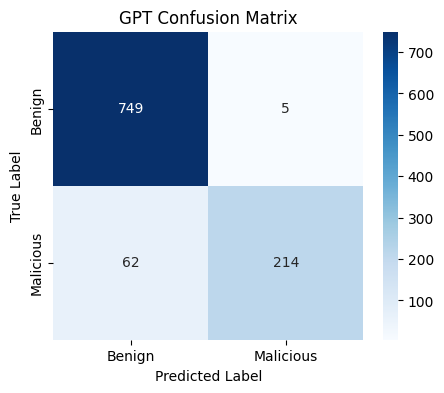

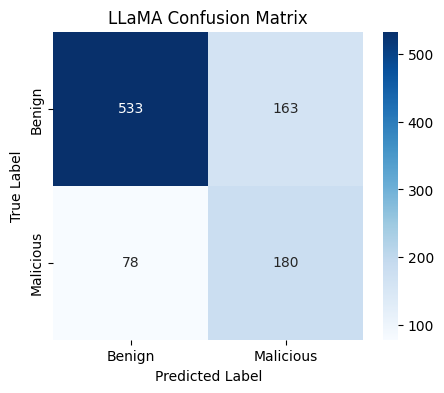

In [12]:



# Print results
print("GPT Metrics:")
print(f"Accuracy: {gpt_accuracy:.4f}")
print(f"Precision: {gpt_precision:.4f}")
print(f"Recall: {gpt_recall:.4f}")
print(f"F1 Score: {gpt_f1:.4f}\n")

print("LLaMA Metrics:")
print(f"Accuracy: {llama_accuracy:.4f}")
print(f"Precision: {llama_precision:.4f}")
print(f"Recall: {llama_recall:.4f}")
print(f"F1 Score: {llama_f1:.4f}")

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(gpt_results['label'], gpt_results['llm_prediction'], "GPT Confusion Matrix")
plot_confusion_matrix(llama_filtered_results['label'], llama_filtered_results['llm_prediction'], "LLaMA Confusion Matrix")


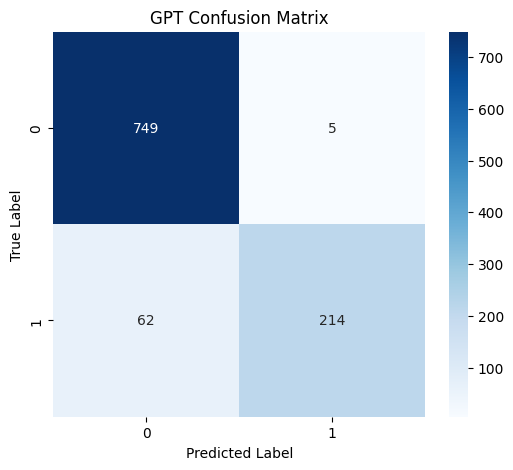

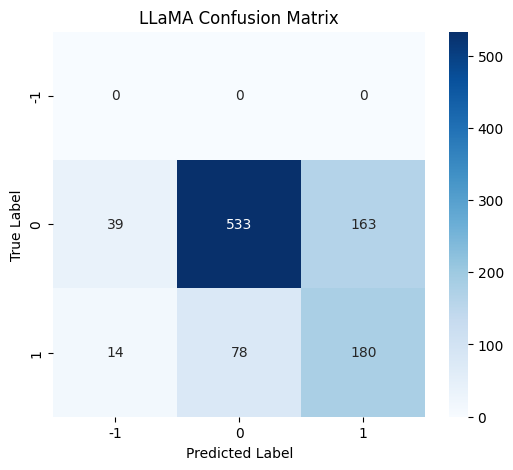

In [13]:
# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(gpt_results['label'], gpt_results['llm_prediction'], "GPT Confusion Matrix", labels=[0, 1])
plot_confusion_matrix(llama_results['label'], llama_results['llm_prediction'], "LLaMA Confusion Matrix", labels=[-1, 0, 1])


In [14]:
evaluation_metrics_df = pd.DataFrame({
    "Model": ["GPT", "LLaMA"],
    "Accuracy": [f"{gpt_accuracy:.4f}", f"{llama_accuracy:.4f}"],
    "Precision": [f"{gpt_precision:.4f}", f"{llama_precision:.4f}"],
    "Recall": [f"{gpt_recall:.4f}", f"{llama_recall:.4f}"],
    "F1 Score": [f"{gpt_f1:.4f}", f"{llama_f1:.4f}"]
})

latex_table = evaluation_metrics_df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lllll}
\toprule
Model & Accuracy & Precision & Recall & F1 Score \\
\midrule
GPT & 0.9350 & 0.9772 & 0.7754 & 0.8646 \\
LLaMA & 0.7080 & 0.4657 & 0.4623 & 0.4591 \\
\bottomrule
\end{tabular}



In [17]:
# Compute evaluation metrics for GPT
gpt_report = classification_report(gpt_results['label'], gpt_results['llm_prediction'], output_dict=True)

# Compute evaluation metrics for LLaMA including -1 category
llama_report = classification_report(llama_results['label'], llama_results['llm_prediction'], output_dict=True)

# Generate LaTeX table
# Generate LaTeX table
evaluation_metrics_df = pd.DataFrame({
    "Class": ["0 (Benign)", "1 (Malicious)", "Accuracy", "Balanced Accuracy"],
    "GPT Precision": [f"{gpt_report['0']['precision']:.2f}", f"{gpt_report['1']['precision']:.2f}", f"{gpt_report['accuracy']:.2f}", f"{gpt_report['macro avg']['precision']:.2f}"],
    "GPT Recall": [f"{gpt_report['0']['recall']:.2f}", f"{gpt_report['1']['recall']:.2f}", "", ""],
    "GPT F1-Score": [f"{gpt_report['0']['f1-score']:.2f}", f"{gpt_report['1']['f1-score']:.2f}", "", ""],
    "GPT Support": [f"{gpt_report['0']['support']}", f"{gpt_report['1']['support']}", "", ""],
    "LLaMA Precision": [f"{llama_report['0']['precision']:.2f}", f"{llama_report['1']['precision']:.2f}", f"{llama_report['accuracy']:.2f}", f"{llama_report['macro avg']['precision']:.2f}"],
    "LLaMA Recall": [f"{llama_report['0']['recall']:.2f}", f"{llama_report['1']['recall']:.2f}", "", ""],
    "LLaMA F1-Score": [f"{llama_report['0']['f1-score']:.2f}", f"{llama_report['1']['f1-score']:.2f}", "", ""],
    "LLaMA Support": [f"{llama_report['0']['support']}", f"{llama_report['1']['support']}", "", ""]
})

latex_table = evaluation_metrics_df.to_latex(index=False)
print(latex_table)


\begin{tabular}{lllllllll}
\toprule
Class & GPT Precision & GPT Recall & GPT F1-Score & GPT Support & LLaMA Precision & LLaMA Recall & LLaMA F1-Score & LLaMA Support \\
\midrule
0 (Benign) & 0.92 & 0.99 & 0.96 & 754.0 & 0.87 & 0.73 & 0.79 & 735.0 \\
1 (Malicious) & 0.98 & 0.78 & 0.86 & 276.0 & 0.52 & 0.66 & 0.59 & 272.0 \\
Accuracy & 0.93 &  &  &  & 0.71 &  &  &  \\
Balanced Accuracy & 0.95 &  &  &  & 0.47 &  &  &  \\
\bottomrule
\end{tabular}



c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Motunrayo Ibiyo\Documents\EDISS Masters Programme\MALRAG\MAL-RAG-master\MAL-RAG-master\.malvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and be